<a href="https://colab.research.google.com/github/timhu08/GitHub/blob/master/Colaboratory_TF-IDF_similarity%20scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -U ckip-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.3 MB/s eta 0:00:00


In [2]:
from ckip_transformers import __version__
from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger, CkipNerChunker


# Show version
print(__version__)

# Initialize drivers
print("Initializing drivers ... WS")
ws_driver = CkipWordSegmenter(model="albert-base", device=0)
print("Initializing drivers ... POS")
pos_driver = CkipPosTagger(model="albert-base", device=0)
print("Initializing drivers ... NER")
ner_driver = CkipNerChunker(model="albert-base", device=0)
print("Initializing drivers ... all done")
print()

0.3.4
Initializing drivers ... WS


Initializing drivers ... POS


Initializing drivers ... NER


Initializing drivers ... all done



In [21]:
def clean(sentence_ws, sentence_pos):
  short_with_pos = []
  short_sentence = []
  stop_pos = set(['Nep', 'Nh', 'Nb']) # 這 3 種詞性不保留
  for word_ws, word_pos in zip(sentence_ws, sentence_pos):
    # 只留名詞和動詞
    is_N_or_V = word_pos.startswith("V") or word_pos.startswith("N")
    # 去掉名詞裡的某些詞性
    is_not_stop_pos = word_pos not in stop_pos
    # 只剩一個字的詞也不留
    is_not_one_charactor = not (len(word_ws) == 1)
    # 組成串列
    if is_N_or_V and is_not_stop_pos and is_not_one_charactor:
      short_with_pos.append(f"{word_ws}({word_pos})")
      short_sentence.append(f"{word_ws}")
  return (" ".join(short_sentence), " ".join(short_with_pos))

In [22]:
def main():
    text = [
        '經過多年激烈戰事，複製人大戰即將結束。絶地議會派歐比王將導致戰亂的主謀者繩之以法；不料，西斯勢力已悄悄深入銀河系，勢力漸大的議長白卜庭用黑暗勢力的力量，誘惑天行者安納金轉變成黑武士達斯維達，幫助他達成心願建立銀河帝國，剷除絕地武士…【星際大戰】系列電影最後一塊拼圖，喬治盧卡斯不僅要解開黑武士的影壇跨世紀謎團，更要著手打造影史最大星際戰爭。',
        '故事由《魔戒首部曲：魔戒現身》展開，一位名叫佛羅多的年輕人，無意間得到一枚有著神秘力量的戒指，卻發現這枚戒指原來是黑暗魔王索倫所擁有。幾經波折後，他決定摧毀魔戒，以免索倫奪回去鞏固自己的勢力。巫師甘道夫、精靈、矮人、哈比人和人類於是組成魔戒遠征隊，協助佛羅多前往索倫統治的「中土世界」，將魔戒丟入末日火山摧毀。旅途中索倫派出怪獸追殺佛羅多一群人，魔戒也開始腐蝕人心，讓人產生難以抵擋的慾望，考驗著每位接觸戒指的意志力。',
        '故事講述二次大戰期間，主角史提芬羅傑斯想參軍替美國打倒納粹德軍，可是他未能通過體能檢查，於是他參加了軍方一個秘密實驗計劃—重生計劃，參加者會被改造成為超級戰士，主角史提芬被改造後成為了唯一成功的實驗品，自此之後，他身穿紅、白、藍三色戰鬥服為國效力，就成為了美國隊長。'
    ]
    ws = ws_driver(text)
    pos = pos_driver(ws)
    ner = ner_driver(text)
    print()
    print('=====')
    for sentence, sentence_ws, sentence_pos, sentence_ner in zip(text, ws, pos, ner):
        print("原文：")
        print(sentence)
        (short, res) = clean(sentence_ws, sentence_pos)
        print("斷詞後：")
        print(short)
        print("斷詞後+詞性標注：")
        print(res)
        print('=====')
if __name__ == "__main__":
    main()

Inference: 100%|██████████| 1/1 [00:00<00:00, 17.98it/s]


=====
原文：
經過多年激烈戰事，複製人大戰即將結束。絶地議會派歐比王將導致戰亂的主謀者繩之以法；不料，西斯勢力已悄悄深入銀河系，勢力漸大的議長白卜庭用黑暗勢力的力量，誘惑天行者安納金轉變成黑武士達斯維達，幫助他達成心願建立銀河帝國，剷除絕地武士…【星際大戰】系列電影最後一塊拼圖，喬治盧卡斯不僅要解開黑武士的影壇跨世紀謎團，更要著手打造影史最大星際戰爭。
斷詞後：
經過 激烈 戰事 複製人 大戰 結束 絶地 議會 派歐比王將 導致 戰亂 主謀 繩之以法 勢力 深入 銀河系 勢力 議長 黑暗 勢力 力量 誘惑 天行 轉變成 黑武士 幫助 達成 心願 建立 銀河 帝國 剷除 絕地 武士 星際 大戰 系列 電影 最後 拼圖 解開 黑武士 影壇 世紀 謎團 著手 打造 影史 星際 戰爭
斷詞後+詞性標注：
經過(VCL) 激烈(VH) 戰事(Na) 複製人(Na) 大戰(Na) 結束(VHC) 絶地(VJ) 議會(Nc) 派歐比王將(VF) 導致(VL) 戰亂(Na) 主謀(Na) 繩之以法(VB) 勢力(Na) 深入(VCL) 銀河系(Nc) 勢力(Na) 議長(Na) 黑暗(Na) 勢力(Na) 力量(Na) 誘惑(VC) 天行(Na) 轉變成(VG) 黑武士(VH) 幫助(VC) 達成(VC) 心願(Na) 建立(VC) 銀河(Na) 帝國(Na) 剷除(VC) 絕地(Na) 武士(Na) 星際(Nc) 大戰(Na) 系列(Na) 電影(Na) 最後(Nd) 拼圖(Na) 解開(VC) 黑武士(VH) 影壇(Nc) 世紀(Na) 謎團(Na) 著手(VF) 打造(VC) 影史(Na) 星際(Nc) 戰爭(Na)
=====
原文：
故事由《魔戒首部曲：魔戒現身》展開，一位名叫佛羅多的年輕人，無意間得到一枚有著神秘力量的戒指，卻發現這枚戒指原來是黑暗魔王索倫所擁有。幾經波折後，他決定摧毀魔戒，以免索倫奪回去鞏固自己的勢力。巫師甘道夫、精靈、矮人、哈比人和人類於是組成魔戒遠征隊，協助佛羅多前往索倫統治的「中土世界」，將魔戒丟入末日火山摧毀。旅途中索倫派出怪獸追殺佛羅多一群人，魔戒也開始腐蝕人心，讓人產生難以抵擋的慾望，考驗著每位接觸戒指的意志力。
斷詞後：
故事 魔戒 魔戒 現身 展開 名叫 年輕人 無意 得到 神秘 力量 戒指 發現 戒指 黑暗 魔王 擁有 幾經 

In [28]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ['天氣 地震',
      '天氣下雨　天氣',
      '天氣 地震',
      '天氣 地震']

# Initialize an instance of tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.        0.2928272 1.        1.       ]
 [0.2928272 1.        0.2928272 0.2928272]
 [1.        0.2928272 1.        1.       ]
 [1.        0.2928272 1.        1.       ]]


<div class="markdown-google-sans">
  <h2>Colab 是什麼？</h2>
</div>

Colab &#40;全名為「Colaboratory」&#41; 可讓你在瀏覽器中編寫及執行 Python 程式碼，並具有以下優點：
- 不必進行任何設定
- 免付費使用 GPU
- 輕鬆共用

無論你是<strong>學生</strong>、<strong>數據資料學家</strong>或是 <strong>AI 研究人員</strong>，Colab 都能讓你的工作事半功倍。請觀看 <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colab 的簡介影片</a>瞭解詳情，或是直接瀏覽以下的新手入門說明！

<div class="markdown-google-sans">

## <strong>開始使用</strong>
</div>

你正在閱讀的文件並非靜態網頁，而是名為 <strong>Colab 筆記本</strong>的互動式環境，可讓你撰寫和執行程式碼。

舉例來說，以下是包含簡短 Python 指令碼的<strong>程式碼儲存格</strong>，可進行運算、將值儲存至變數中並列印運算結果：

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

如要執行上方儲存格中的程式碼，請按一下進行選取，再按一下程式碼左側的播放鍵，或是使用鍵盤快速鍵「Command/Ctrl + Enter 鍵」。按一下儲存格即可開始編輯程式碼。

在一個儲存格中定義的變數之後可用於其他儲存格：

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab 筆記本可讓你在單一文件中結合<strong>可執行的程式碼</strong>和 <strong>RTF 格式</strong>，並附帶<strong>圖片</strong>、<strong>HTML</strong>、<strong>LaTeX</strong> 等其他格式的內容。你建立的 Colab 筆記本會儲存到你的 Google 雲端硬碟帳戶中。你可以輕鬆將 Colab 筆記本與同事或朋友共用，讓他們在筆記本上加上註解，或甚至進行編輯。詳情請參閱 <a href="/notebooks/basic_features_overview.ipynb">Colab 總覽</a>。如要建立新的 Colab 筆記本，你可以使用上方的「檔案」選單或以下連結：<a href="http://colab.research.google.com#create=true">建立新的 Colab 筆記本</a>。

Colab 筆記本是由 Colab 代管的 Jupyter 筆記本。如要進一步瞭解 Jupyter 專案，請參閱 <a href="https://www.jupyter.org">jupyter.org</a>。

<div class="markdown-google-sans">

## 數據資料學
</div>

Colab 可讓你充分利用熱門 Python 程式庫的強大功能，對資料進行分析並以視覺化方式呈現。下方的程式碼儲存格使用 <strong>numpy</strong> 來產生一些隨機性資料，並透過 <strong>matplotlib</strong> 將這些資料視覺化。按一下儲存格即可開始編輯程式碼。

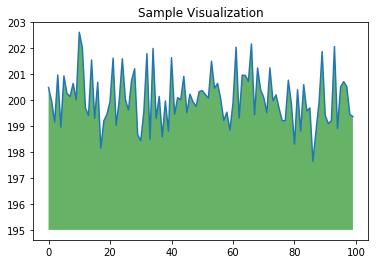

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

你可從自己的 Google 雲端硬碟帳戶 &#40;包括試算表&#41;、GitHub 和許多其他來源，將資料匯入 Colab 筆記本中。如要進一步瞭解如何匯入資料以及將 Colab 用於數據資料學，請參閱下方「<a href="#working-with-data">處理資料</a>」底下的連結。

<div class="markdown-google-sans">

## 機器學習
</div>

你只需要寫<a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">幾行程式碼</a>，即可透過 Colab 匯入圖片資料集、根據圖片資料集訓練圖片分類工具並評估模型。Colab 筆記本可在 Google 的雲端伺服器上執行程式碼，也就是說，您可以充分運用 Google 硬體的強大效能 &#40;包括 <a href="#using-accelerated-hardware">GPU 和 TPU</a>&#41;，而不必在意自己的電腦性能如何，因為你只要使用瀏覽器就可以了。

Colab 廣泛運用於機器學習社群，相關應用包括：
- 開始使用 TensorFlow
- 開發及訓練類神經網路
- 使用 TPU 進行實驗
- 推廣 AI 研究
- 建立教學課程

如要查看示範機器學習應用程式的範例 Colab 筆記本，請參閱下方的<a href="#machine-learning-examples">機器學習範例</a>。

<div class="markdown-google-sans">

## 其他資源

### 在 Colab 中使用筆記本

</div>

- [Colaboratory 總覽](/notebooks/basic_features_overview.ipynb)
- [Markdown 指南](/notebooks/markdown_guide.ipynb)
- [匯入程式庫及安裝依附元件](/notebooks/snippets/importing_libraries.ipynb)
- [儲存和載入 GitHub 中的筆記本](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [互動式表單](/notebooks/forms.ipynb)
- [互動式小工具](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### 處理資料
</div>

- [載入資料：雲端硬碟、試算表及 Google Cloud Storage](/notebooks/io.ipynb)
- [圖表：將資料視覺化](/notebooks/charts.ipynb)
- [開始使用 BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### 機器學習密集課程

<div>

以下是一些 Google 線上機器學習課程的筆記本。詳情請參閱<a href="https://developers.google.com/machine-learning/crash-course/">完整的課程網站</a>。
- [Pandas DataFrame 簡介](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [以 tf.keras 使用合成資料進行線性迴歸](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### 使用加速硬體
</div>

- [搭配 GPU 使用 TensorFlow](/notebooks/gpu.ipynb)
- [使用 TPU 的 TensorFlow](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### 主要範例

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo Voice Swap</a>：使用 Nvidia 的 NeMo 對話式 AI 工具組將音訊片段中的語音換成電腦產生的語音。

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">重新訓練圖片分類工具</a>：以預先訓練的圖片分類工具為基礎，建立一個分辨花朵的 Keras 模型。
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">文字分類</a>：將 IMDB 電影評論分類為<em>正面</em>或<em>負面</em>。
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">風格轉換</a>：運用深度學習轉換圖片的風格。
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">支援多種語言的 Universal Sentence Encoder 問與答</a>：使用機器學習模型來回答 SQuAD 資料集的問題。
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">影片畫面內插</a>：預測影片在第一個與最後一個畫面之間的內容。
